In [991]:
'''
GIBots ML Assignment.
Problem Type:- Multiclass Classification.

Problem Statement:- we have given a couple of documents. From the documents 
we have extracted some sort of data or content.
Data are extracted in following ways.

lets say we have certain text:-"programmers are writing codes to build softwares".
we are not using all the text but instead some Ngrams.
2Grams means we get only two word from the sentence(programmers are)
3Grams means(programmers are writing)

After extarction we are using 145 different features to represent that Ngrams amount of text.
out of 145 distinct features some contain textual info, some contain boolean info(yes or no)
and some contain numeric data.

But, here the text is not in raw form instead its encoded in cryptographic hashing format
hashing is generally used for security purpose. Its a irreversible process(we cannot able to get 
the original content from the encoded) process. 
Its computationally infeasible to get the original content.

Data:- we are given one csv file of training set one of testing set.
And csv file contain the targetlabel of the training set.
we have also given the format of submitting our answers.
'''

'\nGIBots ML Assignment.\nProblem Type:- Multiclass Classification.\n\nProblem Statement:- we have given a couple of documents. From the documents \nwe have extracted some sort of data or content.\nData are extracted in following ways.\n\nlets say we have certain text:-"programmers are writing codes to build softwares".\nwe are not using all the text but instead some Ngrams.\n2Grams means we get only two word from the sentence(programmers are)\n3Grams means(programmers are writing)\n\nAfter extarction we are using 145 different features to represent that Ngrams amount of text.\nout of 145 distinct features some contain textual info, some contain boolean info(yes or no)\nand some contain numeric data.\n\nBut, here the text is not in raw form instead its encoded in cryptographic hashing format\nhashing is generally used for security purpose. Its a irreversible process(we cannot able to get \nthe original content from the encoded) process. \nIts computationally infeasible to get the origi

library Imported

In [992]:
#pandas library is declared to import the csv file 
#and the dataframe out it
#numpy is used to perform calculation and generation part
#seaborn and matplotlib is used to visualize or plot the model data or performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [993]:
#here we have two dataset 
#one contain only the data/content 
#the other one contain the corressponding label or the class 
#to which the piece of data belong to 
#or the target class(which we have to predict for the new data point)

train_df = pd.read_csv("/home/raghu/Downloads/train.csv")
train_lables_df = pd.read_csv("/home/raghu/Downloads/trainLabels.csv")

#test set
#we have imported the testing set also, but it would be used for testing after training.
test_df = pd.read_csv("/home/raghu/Downloads/test.csv")
test_df.head()

,1698001,NO,NO.1,5KaYd5siHnBD/IjH8BF1fPz5zrCADHZia/Lrhlyxkvc=,FzMc/XY2ETaomhy8gPc9UL8LRkEnQA56+/wVF1fogk8=,1.41479820627803,0,1,0.1,0.202060221870048,...,0.30,1.8,1262.3,892.3,NO.36,NO.37,NO.38,0.31,0.0896860986547085,0.193343898573693.1
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


In [994]:
#our test set does not contain features name
#assign the features name to it.
test_df.columns = train_df.columns
test_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1698002,NO,NO,9ACcuXc7MMm9V7jZSr3P3VxAKyMvLAtsdwPKwgncc+k=,WV5vAHFyqkeuyFB5KVNGFOBuwjkUGKYc8wh9QfpVzAA=,0.832679,0.049834,0.945938,0.317427,0.482021,...,1.0,0.866667,4672,3311,NO,NO,NO,5,0.945032,0.471318
1,1698003,NO,NO,MeBJ/ZzEIXfNKat4w1oeDxiMNKrAeY0PH41i00hpYDo=,tnLDGLnpYhzsik5+X+WPo4KQJoQA0TfWRlmEtQ3XNJQ=,1.415919,0.000000,1.000000,0.000000,0.703088,...,-1.0,1.000000,1263,892,NO,NO,NO,8,0.557175,0.693587
2,1698004,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.870000,4672,3306,YES,NO,YES,0,0.870538,0.405822
3,1698005,NO,NO,uduY7XWJ8eFgTltv5P0rPh5GW6KwBu+tPFH13uQRN+0=,0L7+hNDV8S57etySgdljbm2AK1zQuLP77lGk2hyEmCo=,1.129212,0.087020,0.814240,1.112804,0.874318,...,0.0,0.870000,4400,3413,YES,NO,YES,2,0.224729,0.870909
4,1698006,NO,NO,kM4KU87XvnvKRvf4dN3Tu4zQYq8fpcqhDTFADWdfCg8=,4LhhvTzxwvh2SnFtcpaRasyvph66a3YDIQCshAfyS2o=,1.415919,0.000000,1.000000,0.000000,0.232779,...,0.0,1.000000,1263,892,YES,NO,YES,6,0.536996,0.223278


Data Description

Data size

In [995]:
train_df.shape
#we have 10,000 rows and 145 columns(features)

(9999, 146)

In [996]:
train_lables_df.shape
#we have 33 different class(one is id) to which our model belong
#each row of text belong to one of these class
#As mentioned in the document the order of both the set are same.

(49999, 34)

Dataset view

In [997]:
#main training dataset
train_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.0,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.0,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.0,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,0.0,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045


In [998]:
#target class dataset
train_lables_df.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Now, to proceed further we have to merge this two datasets
according to 'id' key 

In [999]:
#traverse through each row and insert the label name as data point to target_class feature
train_lables_df['target_class'] = train_lables_df.drop('id',axis=1).idxmax(axis=1)

#here we have added one extra target col
#comes from each row's features name
train_lables_df.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y25,y26,y27,y28,y29,y30,y31,y32,y33,target_class
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,y33
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,y32
2,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,y3
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,y33
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,y33


In [1000]:
#Now, we only need 'id' and 'target class'.
columns_to_keep = ['id','target_class']
train_lables_df = train_lables_df[columns_to_keep]
train_lables_df.head()

,id,target_class
0,1,y33
1,2,y32
2,3,y3
3,4,y33
4,5,y33


In [1001]:
#as we know ML only understand the integet type of value
#so, we have to convert it into the int type
#like our target_class contain the value like "y32" so we have to convert it to 32

train_lables_df['target_class'] = train_lables_df['target_class'].str.extract('(\d+)').astype(int)
train_lables_df.head()

,id,target_class
0,1,33
1,2,32
2,3,3
3,4,33
4,5,33


In [1002]:
#now we can merge the two dataset
train_new_df = pd.merge(train_df, train_lables_df, on='id', how='inner')

In [1003]:
#merged dataset
train_new_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x137,x138,x139,x140,x141,x142,x143,x144,x145,target_class
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610,33
1,2,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.510,4678,3306,YES,NO,YES,4,0.741682,0.593630,32
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159,3
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582,33
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045,33


TRAINING DATASET IS READY FOR PREPROCESSING

In [1004]:
train_new_df.info()
#checking the dtypes of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9998
Columns: 147 entries, id to target_class
dtypes: float64(55), int64(32), object(60)
memory usage: 11.3+ MB


DATA CLEANING

In [1005]:
#command to check the misssing value in our dataset
train_new_df.isna().sum()

id                 0
x1              1426
x2              1426
x3              1426
x4              1426
                ... 
x142               0
x143               0
x144               0
x145               0
target_class       0
Length: 147, dtype: int64

In [1006]:
#since approx 10% of our dataset contains null values
#so, we have removed all the null values from the dataset
train_new_df = train_new_df.dropna()

Now we have CLEANED dataset

In [1007]:
train_new_df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x137,x138,x139,x140,x141,x142,x143,x144,x145,target_class
0,1,NO,NO,dqOiM6yBYgnVSezBRiQXs9bvOFnRqrtIoXRIElxD7g8=,GNjrXXA3SxbgD0dTRblAPO9jFJ7AIaZnu/f48g5XSUk=,0.576561,0.073139,0.481394,0.115697,0.472474,...,0.810,3306,4676,YES,NO,YES,2,0.375535,0.464610,33
2,3,NO,NO,ib4VpsEsqJHzDiyL0dZLQ+xQzDPrkxE+9T3mx5fv2wI=,X6dDAI/DZOWvu0Dg6gCgRoNr2vTUz/mc4SdHTNUPS38=,1.341803,0.051422,0.935572,0.041440,0.501710,...,0.850,4678,3306,NO,NO,NO,1,0.776467,0.493159,3
3,4,YES,NO,BfrqME7vdLw3suQp6YAT16W2piNUmpKhMzuDrVrFQ4w=,YGCdISifn4fLao/ASKdZFhGIq23oqzfSbUVb6px1pig=,0.653912,0.041471,0.940787,0.090851,0.556564,...,0.945,3306,4678,NO,NO,YES,3,0.168234,0.546582,33
4,5,NO,NO,RTjsrrR8DTlJyaIP9Q3Z8s0zseqlVQTrlSe97GCWfbk=,3yK2OPj1uYDsoMgsxsjY1FxXkOllD8Xfh20VYGqT+nU=,1.415919,0.000000,1.000000,0.000000,0.375297,...,1.000,1263,892,NO,NO,NO,1,0.246637,0.361045,33
5,6,NO,NO,cz26ErvsEb3tZqeaIlmLIwjn8D7YVXYynSLV1WltcUk=,olN1LoaeSyI8h+udI/jquozrw4R8YQ+cVwHq1dOUO5s=,1.413677,0.000000,1.000000,0.000000,0.667724,...,1.000,1261,892,YES,NO,YES,2,0.263453,0.659001,33


CATEGORICAL ENCODING

In [1008]:
#the cryptographic hashed values is irreversbile 
#means we cannot able to get back the original content of it
#it is designed to be one way for security purpose

#we cannot remove it as 10 features of each data row contain this.

#as we know the hashed codes are unique in nature
#so we can use this uniqueness in indentifiers/content for predicting the target class
#even a minute/small change in input text can result in major change in hashed code

#As we have finite length of hash codes(256 bits for SHA)
#and potentially infinite number of input values.
#this scenario is called is hashing collisions.
#where two different input got same hash value as a output

#our hash code contains the categorical variable 


ENTROPY

In [1009]:
'''
to check for uniqueness we can find the entropy of each features
Entropy suggest the degree of randomness in the dataset

higher entropy can suggest that it contain diverse information
in classification problem features with higher information content can contribute more
to the preditive power of the model

'''


'\nto check for uniqueness we can find the entropy of each features\nEntropy suggest the degree of randomness in the dataset\n\nhigher entropy can suggest that it contain diverse information\nin classification problem features with higher information content can contribute more\nto the preditive power of the model\n\n'

In [1010]:
def calculate_entropy_for_hashed_features(df):
    """
    Identify features with hashed values and calculate entropy for those features.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - entropy_dict: dictionary containing feature names as keys and entropy values as values
    """

    entropy_dict = {}

    # Iterate over columns in the DataFrame
    for column in df.columns:
        # Check if the column contains hashed values (you can adjust this condition based on your data)
        if df[column].apply(lambda x: isinstance(x, str) and len(x) == 44).all():
            # Calculate entropy for the column
            entropy_value = stats.entropy(df[column].value_counts(normalize=True))
            entropy_dict[column] = entropy_value

    return entropy_dict

In [1011]:
number_hashed_coded_features = 0
entropy_results = calculate_entropy_for_hashed_features(train_new_df)
sorted_entropy = sorted(entropy_results.items(), key=lambda x:x[1], reverse=True)
for feature, entropy in sorted_entropy:
    number_hashed_coded_features += 1
    print(f"entropy of {feature}:{entropy}")
print(number_hashed_coded_features)

entropy of x61:8.086641773048031
entropy of x64:7.8004452376128866
entropy of x34:7.795969975058645
entropy of x3:7.6825068155224265
entropy of x94:7.5978976455007325
entropy of x91:6.8332028446451485
entropy of x65:4.9014353232954395
entropy of x35:4.8619658884391495
entropy of x4:4.657173387514883
entropy of x95:4.6025820689010235
10


In [1012]:
#As,same input have same hashed code
#so,we can use the uniqueness property of hashed code to encode the textual document

CATEGORICAL ENCODING

In [1013]:
'''
categorical encoding of hashed code can be done using target encoding 
of categorical variables based on the mean(or other statistical measures)
of the target variables for each category

'''

'\ncategorical encoding of hashed code can be done using target encoding \nof categorical variables based on the mean(or other statistical measures)\nof the target variables for each category\n\n'

In [1014]:

#lower entropy means there is less uncertainity in our dataset
#here fewer categories are dominating
#it gives more predictable or ordered distribution of values
#it have less noise 

'''
since, we are using target encoding for converting so we need the target class here
but in testing we dont have access to target class(we are predicting it)
so we can make use of initial target_encoder in testing set to encode 
the hashed code of testing set
'''

from category_encoders import TargetEncoder
target_encoder = TargetEncoder()

#function to take each features of training and testing
#set each and encode it

#list of features which need to be encoded
cat_columns = ['id','x3','x64','x61','x34','x94','x91','x65','x35','x4','x95']

for col in cat_columns:
    train_new_df[f'{col}_hashed_encoded'] = target_encoder.fit_transform(train_new_df[col], train_new_df['target_class'])
    test_df[f'{col}_hashed_encoded'] = target_encoder.transform(test_df[col])

    train_new_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

'''
the hashed code of both the training and testing set 
got encoded using target encoding
'''

'\nthe hashed code of both the training and testing set \ngot encoded using target encoding\n'

In [1015]:
#label encode the binary input data(ie. yes no)
train_new_df.replace({"YES":1, "NO":0}, inplace=True)

In [1016]:
#Data encoded properly
train_new_df.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x3_hashed_encoded,x64_hashed_encoded,x61_hashed_encoded,x34_hashed_encoded,x94_hashed_encoded,x91_hashed_encoded,x65_hashed_encoded,x35_hashed_encoded,x4_hashed_encoded,x95_hashed_encoded
0,0,0,0.576561,0.073139,0.481394,0.115697,0.472474,1,0,0,...,27.565705,27.565705,27.565705,27.565705,27.565705,27.565705,27.565705,27.295344,28.907544,27.565705
2,0,0,1.341803,0.051422,0.935572,0.041440,0.501710,0,0,1,...,26.139406,23.662450,4.801852,23.662450,26.648121,13.941176,21.050251,27.708838,28.584302,25.148472
3,1,0,0.653912,0.041471,0.940787,0.090851,0.556564,1,0,0,...,27.565705,27.565705,27.565705,27.565705,27.565705,28.966523,30.956207,32.175851,30.602862,32.324077
4,0,0,1.415919,0.000000,1.000000,0.000000,0.375297,0,0,1,...,27.892534,27.717864,27.639062,25.851170,27.717864,27.222771,30.286065,25.631131,28.792451,26.382514
5,0,0,1.413677,0.000000,1.000000,0.000000,0.667724,0,0,0,...,27.565705,27.565705,27.565705,27.565705,26.379165,27.565705,27.833284,26.741497,30.654106,27.887640


DATA SPILITING

In [1017]:
from sklearn.model_selection import train_test_split
x = train_new_df.drop("target_class", axis=1)
y = train_new_df['target_class']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

SCALING OF DATASET

In [1018]:
'''
As all the data points are now got converted into numeric form
but, some data points have higher numeric values
If, we have trained the model using this values, then the model will result in 
containing 'VALUE BAIS'
means comparatively greater values tends have greater dominance over target values

since, in ML all the features are independent to each other and all features contain equal
opportunities in contributing or influencing the final target value of the dataset

To, tackle this problem we need to scale the data points
we have used "MinMaxScaler" for the scaling, as our data points have different range
and to bring them to a common scale 
'''

'\nAs all the data points are now got converted into numeric form\nbut, some data points have higher numeric values\nIf, we have trained the model using this values, then the model will result in \ncontaining \'VALUE BAIS\'\nmeans comparatively greater values tends have greater dominance over target values\n\nsince, in ML all the features are independent to each other and all features contain equal\nopportunities in contributing or influencing the final target value of the dataset\n\nTo, tackle this problem we need to scale the data points\nwe have used "MinMaxScaler" for the scaling, as our data points have different range\nand to bring them to a common scale \n'

In [1019]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_new_df_scaled = scaler.fit_transform(x)

In [1020]:
#after scaling the dataset had become nd-numpy array
#convert it into  Dataframe using pandas library
train_new_df_scaled = pd.DataFrame(train_new_df_scaled, columns=x.columns)

In [1021]:
train_new_df_scaled.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x3_hashed_encoded,x64_hashed_encoded,x61_hashed_encoded,x34_hashed_encoded,x94_hashed_encoded,x91_hashed_encoded,x65_hashed_encoded,x35_hashed_encoded,x4_hashed_encoded,x95_hashed_encoded
0,0.0,0.0,0.390911,0.073674,0.481394,0.083039,0.467886,1.0,0.0,0.0,...,0.772667,0.749541,0.841063,0.759170,0.710619,0.734208,0.631922,0.610032,0.852309,0.592370
1,0.0,0.0,0.909748,0.051797,0.935572,0.029742,0.497376,0.0,0.0,1.0,...,0.683256,0.520765,0.015957,0.525858,0.657538,0.015824,0.073510,0.643071,0.824975,0.385295
2,1.0,0.0,0.443355,0.041774,0.940787,0.065206,0.552707,1.0,0.0,0.0,...,0.772667,0.749541,0.841063,0.759170,0.710619,0.808069,0.922508,1.000000,0.995667,1.000000
3,0.0,0.0,0.960000,0.000000,1.000000,0.000000,0.369863,0.0,0.0,1.0,...,0.793155,0.758459,0.843722,0.656686,0.719422,0.716126,0.865073,0.477056,0.842576,0.491010
4,0.0,0.0,0.958480,0.000000,1.000000,0.000000,0.664834,0.0,0.0,0.0,...,0.772667,0.749541,0.841063,0.759170,0.641980,0.734208,0.654855,0.565777,1.000000,0.619948


In [1022]:
print(x_train)

      x1  x2        x5        x6        x7        x8        x9  x10  x11  x12  \
5893   0   0  1.413677  0.000000  1.000000  0.000000  0.777954    0    0    0   
647    0   0  1.205687  0.589837  0.779492  1.115245  0.826627    0    0    0   
9616   0   0  1.415919  0.000000  1.000000  0.000000  0.947743    0    0    0   
2626   0   0  1.415919  0.000000  1.000000  0.000000  0.514648    0    0    1   
8221   0   0  1.414798  0.000000  1.000000  0.000000  0.759905    0    0    0   
...   ..  ..       ...       ...       ...       ...       ...  ...  ...  ...   
7005   1   1  1.062519  0.050740  0.942616  0.451827  0.660317    1    0    0   
7062   0   0  1.135814  0.092559  0.918330  0.236540  0.283604    0    0    0   
7276   0   0  1.316601  0.071364  0.943151  0.498034  0.492834    0    0    0   
1165   0   0  1.413677  0.000000  1.000000  0.000000  0.694687    1    0    0   
9840   0   0  1.326679  0.062311  0.955535  0.026316  0.517956    1    0    0   

      ...  x3_hashed_encode

MODEL TRAINING

In [1023]:
#we have picked logisticRegression for training 
#its 'multinomial' type
#its softmax function for predicting the probabilities of the model
#lbfgs is a optimization techniques
#verbose is declared to track the progress of training

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, verbose=1)
model.fit(x_train,y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         4704     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30853D+04    |proj g|=  2.05963D+07


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.



At iterate   50    f=  1.11279D+04    |proj g|=  2.16023D+05

At iterate  100    f=  1.04854D+04    |proj g|=  2.31701D+05

At iterate  150    f=  9.98573D+03    |proj g|=  8.18631D+04



At iterate  200    f=  9.84416D+03    |proj g|=  1.62544D+05

At iterate  250    f=  9.69712D+03    |proj g|=  8.97249D+04

At iterate  300    f=  9.62120D+03    |proj g|=  6.41987D+04

At iterate  350    f=  9.51493D+03    |proj g|=  2.58011D+05

At iterate  400    f=  9.44025D+03    |proj g|=  8.94956D+04

At iterate  450    f=  9.30732D+03    |proj g|=  3.47526D+04

At iterate  500    f=  9.20526D+03    |proj g|=  1.68404D+05

At iterate  550    f=  9.11439D+03    |proj g|=  6.99194D+04

At iterate  600    f=  8.95085D+03    |proj g|=  1.57115D+05

At iterate  650    f=  8.81850D+03    |proj g|=  7.60414D+04

At iterate  700    f=  8.77311D+03    |proj g|=  2.81626D+04

At iterate  750    f=  8.70124D+03    |proj g|=  4.90664D+04

At iterate  800    f=  8.58571D+03    |proj g|=  4.36357D+04

At iterate  850    f=  8.53301D+03    |proj g|=  4.47059D+04

At iterate  900    f=  8.49329D+03    |proj g|=  7.98079D+04

At iterate  950    f=  8.43674D+03    |proj g|=  5.31505D+04

At iter

/home/raghu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  8.8min finished


LogisticRegression(max_iter=10000, multi_class='multinomial', verbose=1)

At iterate10000    f=  4.69760D+03    |proj g|=  1.34695D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 4704  10000  10703      1     0     0   1.347D+04   4.698D+03
  F =   4697.5973136847952     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [1024]:
#predicting the validation test
y_pred = model.predict(x_test)

MODEL VALIDATION

In [1025]:

from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/home/raghu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raghu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raghu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/raghu/.local/lib/python3.10/site-packages/

In [1026]:
print(accuracy)

0.8205128205128205


In [1027]:
#we have 82% accuracy in our validation set.

In [1028]:
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.85      0.92      0.88        12
           4       1.00      0.33      0.50         6
           6       0.57      0.79      0.67        34
           7       0.73      0.65      0.69        34
           9       0.80      0.76      0.78        49
          10       1.00      0.25      0.40         4
          11       0.00      0.00      0.00         1
          12       0.25      0.11      0.15         9
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         2
          21       0.75      0.38      0.50         8
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         6
          25       0.00    

In [1029]:
weights_per_feataure = model.coef_
for feature, weight in zip(x.columns, weights_per_feataure[0]):
    print(f"{feature}:{weight}")

x1:-0.0019848516040625076
x2:-0.0019113160609906708
x5:0.004385568266180375
x6:-0.0005620780173207648
x7:0.0023901856442334656
x8:-0.0008705307298301452
x9:-0.0030882701692963237
x10:0.01001662907339171
x11:-0.000609616392965338
x12:-0.0034231335394999374
x13:-0.0006779570963786688
x14:-0.0011638318326778127
x15:0.01681564478316603
x16:0.0020248737086217875
x17:0.09151504051563984
x18:-0.015005933624995228
x19:0.0004379816019655339
x20:-0.02140363991775716
x21:0.0011484351217995652
x22:-0.002537752509635229
x23:0.0037536810527451984
x24:0.010123423246472387
x25:0.0033356995372098696
x26:0.010097294244164496
x27:0.0016100713665025254
x28:0.002820985485371196
x29:-0.003126502686293879
x30:-0.003222433166832169
x31:-0.0020012492016471557
x32:-0.0022228033864710073
x33:-0.001410292407182642
x36:0.004535048292530391
x37:-0.0005019999265618976
x38:0.0024906300437851016
x39:-0.0007718524745521686
x40:-0.0029758526016473944
x41:0.008644537498650219
x42:-0.00019833750648878622
x43:0.00458194808

SUMMARY

In [1030]:
#this is our dataset
train_new_df_scaled.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x3_hashed_encoded,x64_hashed_encoded,x61_hashed_encoded,x34_hashed_encoded,x94_hashed_encoded,x91_hashed_encoded,x65_hashed_encoded,x35_hashed_encoded,x4_hashed_encoded,x95_hashed_encoded
0,0.0,0.0,0.390911,0.073674,0.481394,0.083039,0.467886,1.0,0.0,0.0,...,0.772667,0.749541,0.841063,0.759170,0.710619,0.734208,0.631922,0.610032,0.852309,0.592370
1,0.0,0.0,0.909748,0.051797,0.935572,0.029742,0.497376,0.0,0.0,1.0,...,0.683256,0.520765,0.015957,0.525858,0.657538,0.015824,0.073510,0.643071,0.824975,0.385295
2,1.0,0.0,0.443355,0.041774,0.940787,0.065206,0.552707,1.0,0.0,0.0,...,0.772667,0.749541,0.841063,0.759170,0.710619,0.808069,0.922508,1.000000,0.995667,1.000000
3,0.0,0.0,0.960000,0.000000,1.000000,0.000000,0.369863,0.0,0.0,1.0,...,0.793155,0.758459,0.843722,0.656686,0.719422,0.716126,0.865073,0.477056,0.842576,0.491010
4,0.0,0.0,0.958480,0.000000,1.000000,0.000000,0.664834,0.0,0.0,0.0,...,0.772667,0.749541,0.841063,0.759170,0.641980,0.734208,0.654855,0.565777,1.000000,0.619948


In [1031]:
#weight dataset after training the model
weight_df.head()


,feature,weight
0,x1,-0.001985
1,x2,-0.001911
2,x5,0.004386
3,x6,-0.000562
4,x7,0.002390


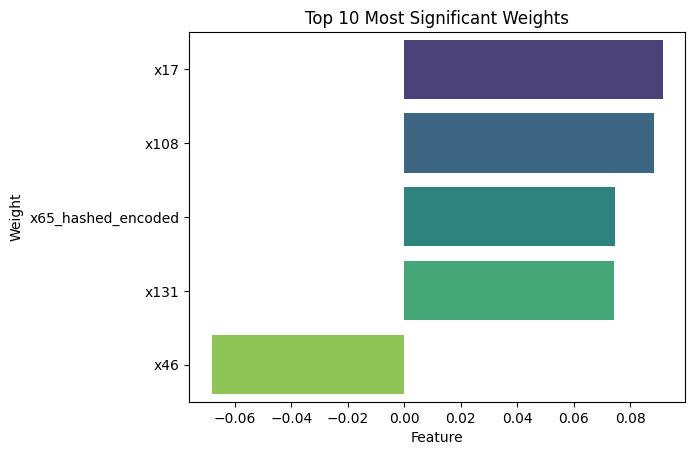

In [1032]:
#barplot of top 5 dominating weight over the model
weights_per_feataure = model.coef_[0]
weight_df = pd.DataFrame({'feature':x.columns, 'weight':weights_per_feataure})

top_10_weights = weight_df.iloc[np.abs(weight_df['weight']).argsort()[-5:][::-1]]

plt.Figure(figsize=(10,10))
sns.barplot(x='weight', y='feature', data=top_10_weights, palette='viridis')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.title('Top 10 Most Significant Weights')
plt.show()

TESTING SET

In [1080]:
test_df.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x3_hashed_encoded,x64_hashed_encoded,x61_hashed_encoded,x34_hashed_encoded,x94_hashed_encoded,x91_hashed_encoded,x65_hashed_encoded,x35_hashed_encoded,x4_hashed_encoded,x95_hashed_encoded
0,0,0,0.832679,0.049834,0.945938,0.317427,0.482021,1,0,0,...,25.812883,26.668426,27.565705,19.169201,25.511296,27.639062,21.050251,24.875000,18.828358,25.158910
1,0,0,1.415919,0.000000,1.000000,0.000000,0.703088,0,0,1,...,28.825767,26.752905,26.752905,26.752905,26.752905,27.717864,30.388983,28.296950,28.537688,31.087950
3,0,0,1.129212,0.087020,0.814240,1.112804,0.874318,0,0,0,...,26.752905,26.752905,28.988839,26.752905,26.752905,14.739521,29.448505,29.530719,29.321671,29.323529
4,0,0,1.415919,0.000000,1.000000,0.000000,0.232779,0,0,1,...,26.430555,23.448192,25.090025,23.608055,23.966361,24.016250,26.505556,25.765963,25.600917,27.887640
5,0,0,1.414798,0.000000,1.000000,0.000000,0.323296,0,0,1,...,24.052776,27.689443,26.752905,27.565705,25.010211,13.641058,28.478787,27.985061,28.792451,25.920792


In [1081]:
#clean the dataset
test_df = test_df.dropna()

In [1082]:
#label encode the binary input data(ie. yes no)
test_df.replace({"YES":1, "NO":0}, inplace=True)

In [1083]:
#scaling of the dataset
test_scaled_df = scaler.fit_transform(test_df)

In [1084]:
test_scaled_df = pd.DataFrame(test_scaled_df, columns=test_df.columns)

In [1085]:
test_scaled_df.head()

,x1,x2,x5,x6,x7,x8,x9,x10,x11,x12,...,x3_hashed_encoded,x64_hashed_encoded,x61_hashed_encoded,x34_hashed_encoded,x94_hashed_encoded,x91_hashed_encoded,x65_hashed_encoded,x35_hashed_encoded,x4_hashed_encoded,x95_hashed_encoded
0,0.0,0.0,0.551569,0.050060,0.941496,0.229001,0.467664,1.0,0.0,0.0,...,0.662787,0.696950,0.841063,0.257279,0.591775,0.738076,0.073510,0.416638,0.000000,0.386189
1,0.0,0.0,0.972881,0.000000,1.000000,0.000000,0.694858,0.0,0.0,1.0,...,0.851656,0.701901,0.811602,0.710586,0.663600,0.742231,0.873894,0.690063,0.821033,0.894106
2,0.0,0.0,0.765774,0.087414,0.798978,0.802810,0.870835,0.0,0.0,0.0,...,0.721714,0.701901,0.892647,0.710586,0.663600,0.057919,0.793289,0.788645,0.887328,0.742955
3,0.0,0.0,0.972881,0.000000,1.000000,0.000000,0.211514,0.0,0.0,1.0,...,0.701507,0.508207,0.751329,0.522606,0.502402,0.547055,0.541061,0.487829,0.572696,0.619948
4,0.0,0.0,0.972072,0.000000,1.000000,0.000000,0.304540,0.0,0.0,1.0,...,0.552450,0.756793,0.811602,0.759170,0.562788,0.000000,0.710179,0.665142,0.842576,0.451457


In [1086]:
y1_pred = model.predict(test_scaled_df)

In [1087]:
result_df = pd.DataFrame({'feature':x_feature, 'predicted_values':y1_pred})

In [1088]:
result_df['predicted_values'].value_counts()

6    1439
7      20
9       6
Name: predicted_values, dtype: int64

In [1089]:
result_df.head()

,feature,predicted_values
0,1698002,6
1,1698003,6
3,1698005,6
4,1698006,6
5,1698007,6


In [1091]:
result_df.to_csv('resulting_set', index=False)

In [1092]:

# Create a new DataFrame to store the '_y' columns
num_repeats = 33
y_columns = {f"_y{i}": [] for i in range(1, num_repeats + 1)}

# Iterate through each row in the original DataFrame
for _, row in df.iterrows():
    data_point = row['feature']
    predicted_value = row['predicted_value']
    
    # Initialize '_y' columns with 0
    y_values = [0] * num_repeats
    
    # Set the value to 1 for the corresponding '_y' column
    y_values[predicted_value - 1] = 1
    
    # Append the values to the respective '_y' columns
    for i in range(num_repeats):
        y_columns[f"_y{i + 1}"].append(y_values[i])

# Create the new DataFrame with '_y' columns
result_df = pd.concat([result_df, pd.DataFrame(y_columns)], axis=1)

# Display the resulting DataFrame
print(result_df)


        feature  predicted_values  _y1  _y2  _y3  _y4  _y5  _y6  _y7  _y8  \
0     1698002.0               6.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     1698003.0               6.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     1698005.0               6.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4     1698006.0               6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
5     1698007.0               6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
...         ...               ...  ...  ...  ...  ...  ...  ...  ...  ...   
1994  1699996.0               6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1995  1699997.0               6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1996  1699998.0               6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1997  1699999.0               6.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2           NaN               NaN  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

      ...  _y24  _y25  _y26  _y27  _y28  _y29  _y30  _y31  _y32  _y33  
0  

THANK YOU